In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# reading the orders dataframe
orders = pd.read_csv('/Users/monazaatari/Documents/Machine learning lab/Machine_Learning_Lab/data/Orders.csv', index_col = 0)
# reading the returns dataframe
returns=pd.read_csv('/Users/monazaatari/Documents/Machine learning lab/Machine_Learning_Lab/data/Returns.csv')


,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [9]:
# checking orders dataset
orders.head()
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [12]:
# checking returns dataset
returns.head()
returns.columns

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [14]:
import re
orders.Profit=orders.Profit.map(lambda x: float(re.sub('[$,]','',x)))
orders.Sales=orders.Sales.map(lambda x: float(re.sub('[$,]','',x)))
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [16]:
orders['Order.Date']=pd.to_datetime(orders['Order.Date'])
orders['Order.Date'].head()
#orders.loc[:,'Order.Month']=orders.loc[:,'Order.Date'].apply(lambda x: x.month_name())
orders['Order.Month']=orders['Order.Date'].apply(lambda x: x.month_name())
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,November
26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,February
25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,October
13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,January
47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,November


In [17]:
orders.groupby(['Order.Month','Category']).agg({'Quantity':'sum'})

Quantity
Order.Month Category                 
April       Furniture            2005
            Office Supplies      6391
            Technology           2070
August      Furniture            3059
            Office Supplies     11019
            Technology           3518
December    Furniture            4506
            Office Supplies     13245
            Technology           4396
February    Furniture            1494
            Office Supplies      4340
            Technology           1595
January     Furniture            1750
            Office Supplies      5480
            Technology           1642
July        Furniture            2157
            Office Supplies      6618
            Technology           2271
June        Furniture            3434
            Office Supplies     11012
            Technology           3563
March       Furniture            2098
            Office Supplies      6283
            Technology           2009
May         Furniture            2484
            Office Supplies      8170
            Technology           2542
November    Furniture            4471
            Office Supplies     13529
            Technology           4379
October     Furniture            3323
            Office Supplies      9585
            Technology           3395
September   Furniture            4111
            Office Supplies     12572
            Technology           3796

In [85]:
orders.loc[:,'Order.Year']=orders.loc[:,'Order.Date'].apply(lambda x: x.year)

orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'Order.Month', 'Order.Year'],
      dtype='object')

In [19]:

returns.columns=['Returned','Order.ID','Region']
Data=pd.merge(orders,returns,how='left',on=["Order.ID","Region"])
Data.shape
#Data.loc[Data.Returned=='Yes']


(51290, 25)

In [20]:
Data.loc[:,'Data.Year']=orders.loc[:,'Order.Date'].apply(lambda x: x.year)

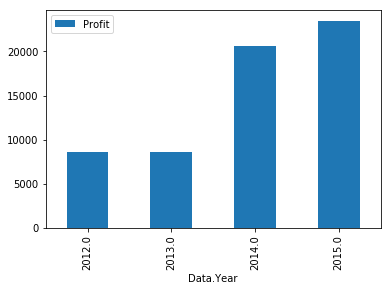

In [98]:
Data.loc[Data.Returned=='Yes'].groupby(['Data.Year']).agg({'Profit':'sum'}).plot.bar()
#Data.head()

In [21]:
Data.loc[Data.Returned=='Yes'].groupby(['Customer.Name']).agg({'Order.ID':'count'}).count()
Data2=Data.loc[Data.Returned=='Yes'].groupby(['Customer.Name']).agg({'Order.ID':'count'})

In [107]:
print(Data2)
Data2.columns=['Count']
Data2[Data2.Count>5].count()

                      Order.ID
Customer.Name                 
Aaron Bergman                2
Aaron Hawkins                2
Aaron Smayling               2
Adam Shillingsburg           3
Adrian Barton                3
Adrian Hane                  4
Aimee Bixby                  1
Alan Barnes                  8
Alan Dominguez               2
Alan Haines                  3
Alan Schoenberger            2
Alan Shonely                 1
Alejandro Ballentine         3
Alejandro Savely            10
Alex Avila                   1
Alex Russell                 2
Alice McCarthy               5
Allen Goldenen               2
Allen Rosenblatt             2
Alyssa Tate                  6
Amy Hunt                     2
Andrew Gjertsen             13
Andrew Roberts               3
Andy Gerbode                 4
Andy Yotov                   1
Anemone Ratner               2
Angele Hood                  5
Ann Blume                   10
Ann Chong                    2
Anna Andreadi                6
...     

Count    124
dtype: int64

In [108]:
Data.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Returned,Region_y,Data.Year
0,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,2,0.0,62.15,40.77,High,November,2014,NaN,NaN,NaN
1,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,9,0.1,-288.77,923.63,Critical,February,2014,NaN,NaN,2015.0
2,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,9,0.1,919.97,915.49,Medium,October,2014,NaN,NaN,2013.0
3,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,5,0.1,-96.54,910.16,Medium,January,2014,NaN,NaN,2013.0
4,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,8,0.0,311.52,903.04,Critical,November,2014,NaN,NaN,2013.0


In [22]:
Data3=Data.loc[Data.Returned=='Yes'].groupby('Region').agg({'Order.ID':'count'}).sort_values('Order.ID')

In [116]:
Data3.shape

(22, 1)

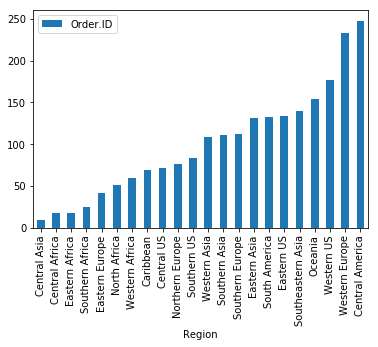

In [119]:
Data3.plot.bar()

In [122]:
Data4=Data.loc[Data.Returned=='Yes'].groupby('Sub.Category').agg({'Order.ID':'count'}).sort_values('Order.ID')

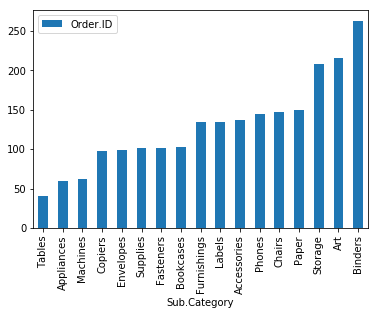

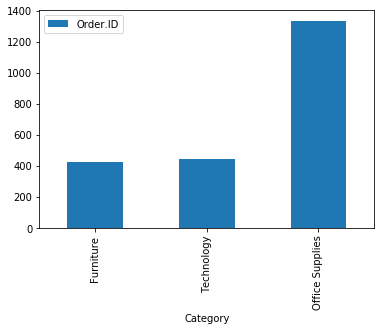

In [124]:
Data4.plot.bar()
Data5=Data.loc[Data.Returned=='Yes'].groupby('Category').agg({'Order.ID':'count'}).sort_values('Order.ID')
Data5.plot.bar()


In [29]:
# grouping by season
def season_helper(x):
    bins = [['December', 'January', 'February'],['March','April','May'],['June','July', 'August'],['September', 'October', 'November']]
    labels = ['Winter', 'Spring','Summer','Fall']
    for i in range(len(labels)):
        if x in bins[i]:            
            return labels[i]
        
Data['Season'] = Data['Order.Month'].apply(season_helper)

Data.head()
Data.Returned=Data.Returned.fillna(0)
Data.loc[Data.Returned=='Yes','Returned']=1






In [31]:
Data.loc[:,'Returned'].head()


0    0
1    0
2    0
3    0
4    0
Name: Returned, dtype: int64

In [33]:
Data['Ship.Date']=pd.to_datetime(Data['Ship.Date'])

In [34]:
Data['Process_Time']=Data['Ship.Date'] - Data['Order.Date']

In [35]:
Data['Process_Time'].head()


0   2 days
1   2 days
2   1 days
3   2 days
4   1 days
Name: Process_Time, dtype: timedelta64[ns]

In [38]:
Data['Process_Time']=Data['Process_Time'].dt.days

0    2
1    2
2    1
3    2
4    1
Name: Process_Time, dtype: int64

In [48]:
Data.columns
product_returned=Data.groupby('Product.ID').agg({'Returned':'sum'})
product_returned.head()
product_returned[product_returned['Returned']>0]
product_returned.columns=['Sum_Returned']
Data=pd.merge(Data,product_returned,how="left",on="Product.ID")

In [53]:
Data['Price']=round(Data['Sales']/Data['Quantity'],1)
New_Data=['Ship.Mode','Segment','Market','Category','Quantity','Discount','Shipping.Cost','Order.Priority','Order.Month','Season','Process_Time','Price','Sum_Returned']
features=Data.loc[:,New_Data]
features.head()

,Ship.Mode,Segment,Market,Category,Quantity,Discount,Shipping.Cost,Order.Priority,Order.Month,Season,Process_Time,Price,Sum_Returned
0,First Class,Consumer,USCA,Technology,2,0.0,40.77,High,November,Fall,2,111.0,0
1,Second Class,Corporate,Asia Pacific,Furniture,9,0.1,923.63,Critical,February,Winter,2,412.2,2
2,First Class,Consumer,Asia Pacific,Technology,9,0.1,915.49,Medium,October,Fall,1,575.0,2
3,First Class,Home Office,Europe,Technology,5,0.1,910.16,Medium,January,Winter,2,578.5,0
4,Same Day,Consumer,Africa,Technology,8,0.0,903.04,Critical,November,Fall,1,354.1,0


In [65]:
from sklearn import linear_model
import sklearn.cross_validation as cv
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(pd.get_dummies(features),Data.Returned, test_size=0.2, random_state=0)
stratisfy_divide = ms.StratifiedKFold(n_splits=5, random_state=0)
logit = linear_model.LogisticRegression()
logit.fit(x_train,y_train)
scores = ms.cross_val_score(estimator=logit,X=x_train, y=y_train, cv=stratisfy_divide)

In [62]:
print(scores)

[0.95540936 0.95393614 0.95491104 0.95308311 0.95454545]


In [66]:
logit.score(x_test,y_test)

0.956716708910119